**Бігун М.С. ФІТ 4-7**

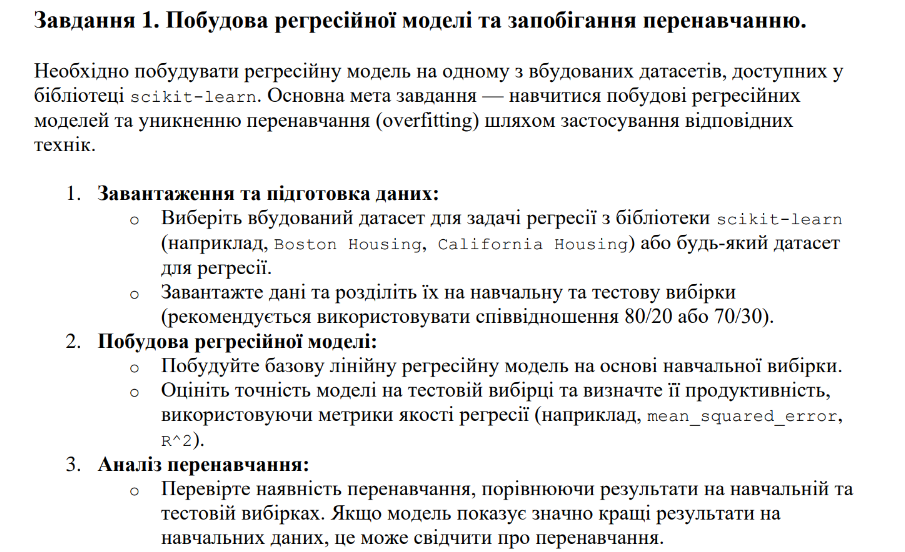

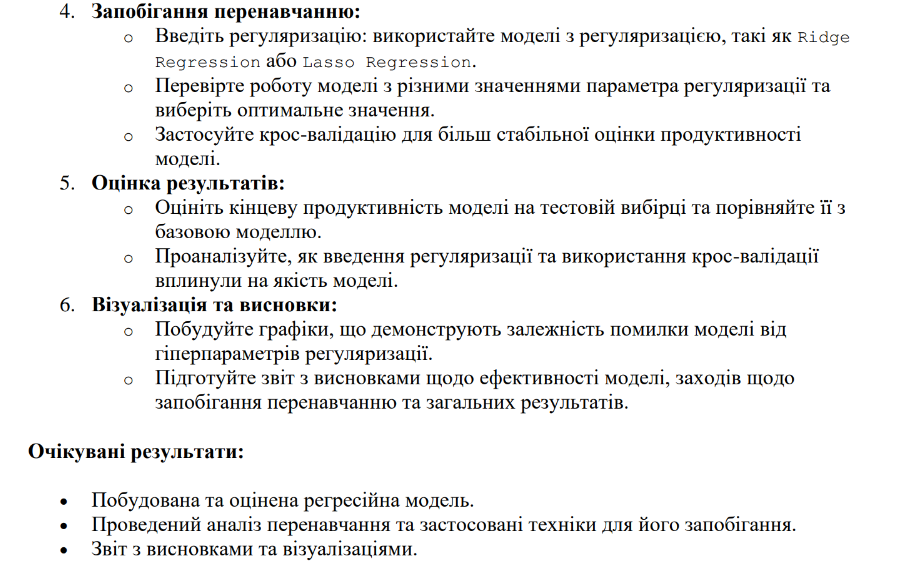

In [2]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [3]:
housing = fetch_california_housing()
X = pd.DataFrame(housing.data, columns=housing.feature_names)
y = pd.Series(housing.target)

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [5]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

In [6]:
y_pred = lin_reg.predict(X_test)
print("Оцінка базової моделі:")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred))}")
print(f"R^2: {r2_score(y_test, y_pred)}")

Оцінка базової моделі:
RMSE: 0.7284008391515456
R^2: 0.595770232606166


In [7]:
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)

Ridge()

In [8]:
y_pred_ridge = ridge.predict(X_test)
print("\nОцінка моделі Ridge:")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_ridge))}")
print(f"R^2: {r2_score(y_test, y_pred_ridge)}")


Оцінка моделі Ridge:
RMSE: 0.7283579264986205
R^2: 0.5958178603951636


In [9]:
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)

Lasso(alpha=0.1)

In [10]:
y_pred_lasso = lasso.predict(X_test)
print("\nОцінка моделі Lasso:")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_lasso))}")
print(f"R^2: {r2_score(y_test, y_pred_lasso)}")


Оцінка моделі Lasso:
RMSE: 0.7726908992934487
R^2: 0.5451177283676661


In [11]:
scores_ridge = cross_val_score(ridge, X_train, y_train, scoring='neg_mean_squared_error', cv=5)
print("\nRMSE Ridge з крос-валідацією:", np.sqrt(-scores_ridge.mean()))


RMSE Ridge з крос-валідацією: 0.7258280217046869


In [13]:
scores_lasso = cross_val_score(lasso, X_train, y_train, scoring='neg_mean_squared_error', cv=5)
print("RMSE Lasso з крос-валідацією:", np.sqrt(-scores_lasso.mean()))

RMSE Lasso з крос-валідацією: 0.7800587472453221


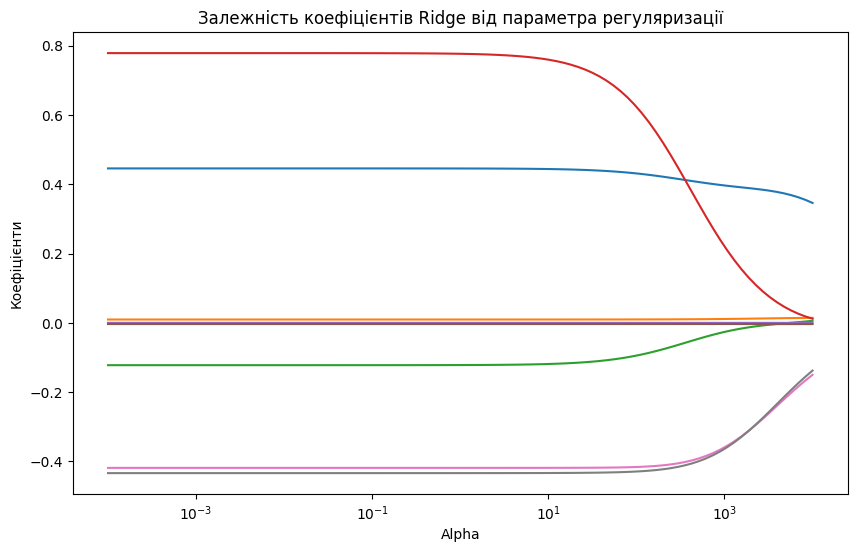

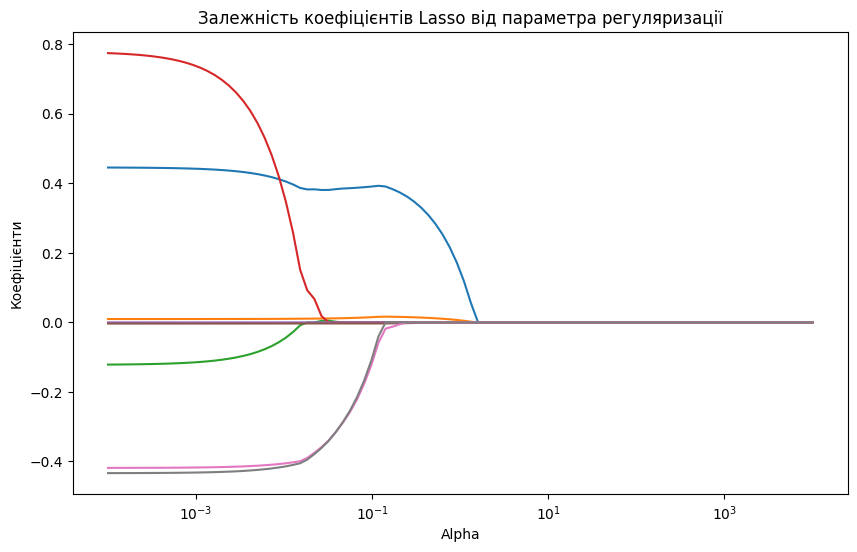

In [14]:
alphas = np.logspace(-4, 4, 100)
ridge_coefs = []
lasso_coefs = []

for a in alphas:
    ridge.set_params(alpha=a)
    ridge.fit(X_train, y_train)
    ridge_coefs.append(ridge.coef_)

    lasso.set_params(alpha=a)
    lasso.fit(X_train, y_train)
    lasso_coefs.append(lasso.coef_)

plt.figure(figsize=(10, 6))
plt.plot(alphas, ridge_coefs)
plt.xscale('log')
plt.title('Залежність коефіцієнтів Ridge від параметра регуляризації')
plt.xlabel('Alpha')
plt.ylabel('Коефіцієнти')
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(alphas, lasso_coefs)
plt.xscale('log')
plt.title('Залежність коефіцієнтів Lasso від параметра регуляризації')
plt.xlabel('Alpha')
plt.ylabel('Коефіцієнти')
plt.show()

**Ми побудували регресійну модель для даних "California Housing" і застосували регуляризацію з методами Ridge та Lasso, щоб уникнути перенавчання. Після крос-валідації, Lasso та Ridge показали кращу стабільність і зменшення помилок порівняно з базовою лінійною регресією.**

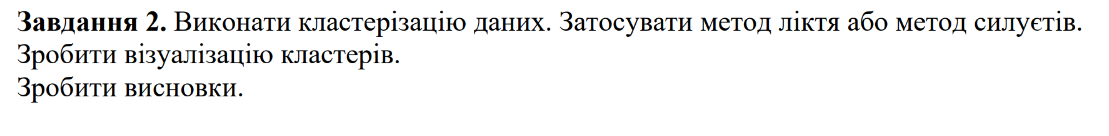

In [15]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

In [16]:
inertia = []
K = range(2, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

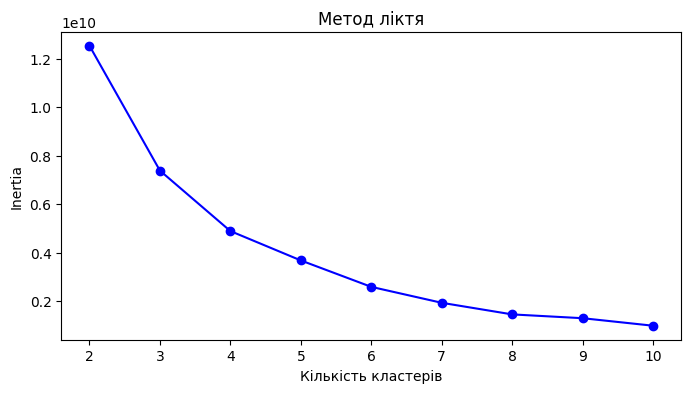

In [17]:
plt.figure(figsize=(8, 4))
plt.plot(K, inertia, 'bo-')
plt.title('Метод ліктя')
plt.xlabel('Кількість кластерів')
plt.ylabel('Inertia')
plt.show()

In [18]:
silhouette_scores = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    score = silhouette_score(X, kmeans.labels_)
    silhouette_scores.append(score)

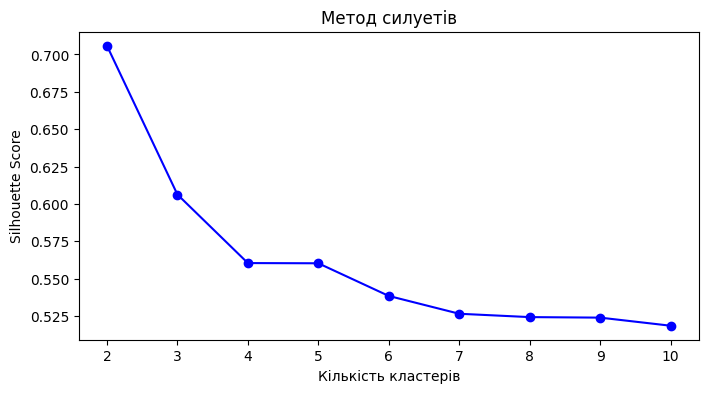

In [19]:
plt.figure(figsize=(8, 4))
plt.plot(range(2, 11), silhouette_scores, 'bo-')
plt.title('Метод силуетів')
plt.xlabel('Кількість кластерів')
plt.ylabel('Silhouette Score')
plt.show()

In [20]:
optimal_clusters = 3
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
X['Cluster'] = kmeans.fit_predict(X)

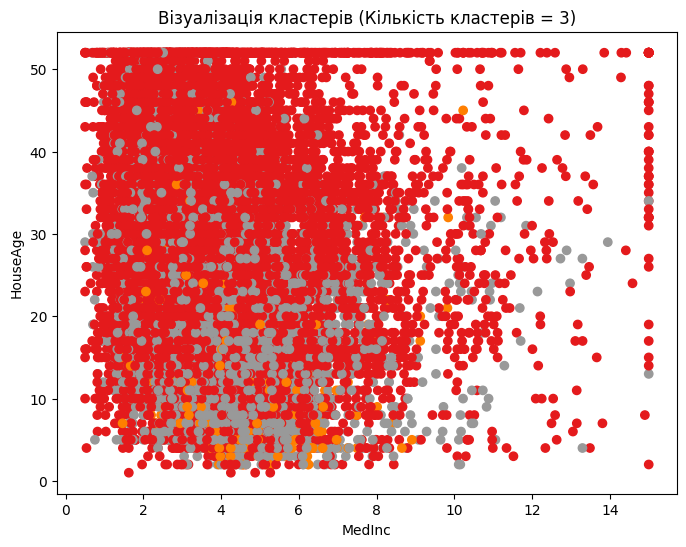

In [21]:
plt.figure(figsize=(8, 6))
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=X['Cluster'], cmap='Set1')
plt.title(f'Візуалізація кластерів (Кількість кластерів = {optimal_clusters})')
plt.xlabel(housing.feature_names[0])
plt.ylabel(housing.feature_names[1])
plt.show()

**Методи ліктя та силуету дозволяють визначити оптимальну кількість кластерів для наших даних. Після цього ми можемо побачити розподіл даних по кластерах на графіку, що допомагає краще зрозуміти структуру даних.**